# Import and Install Dependencies

### To optimize the training process I will pick up only 5 classes(gestures) from the dataset - money, ok, silence, welcome, rock
### I will use the GPU version of TensorFlow 2.0 

In [2]:
# Importing statistical Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importing sklearn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


# Importing Tensorflow  Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import  EarlyStopping, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

In [3]:
# GPU Configuration 
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load the dataset from the CSV files

In [4]:
# Load the dataset from the CSV files function and concat the data
def concat_data(dir):
    all_data = []
    
    for dirname, _, filenames in os.walk(dir):
        
        rel_dir = os.path.relpath(dirname, dir)
        for filename in sorted(filenames):
            if filename.endswith(".csv"):
                print(os.path.join(dirname, filename))
                df = pd.read_csv(os.path.join(dirname, filename))
               
                # Extracting the subfolder name
                # Assuming 'dir' is the parent directory and the immediate subfolder is the label
                subfolder_label = rel_dir.split(os.sep)[0]
                
                # Adding the subfolder label as a new column
                df['Label'] = subfolder_label
                
                # Append the DataFrame to the list
                all_data.append(df)
                
    combined_df = pd.concat(all_data, axis=0, ignore_index=True)         
    combined_df.to_csv(output_file, index=False)
    
    print(f"Combined CSV saved as {output_file}")
    
    return combined_df

In [5]:
dir = "/Users/gala/Downloads/dataset_gestures"
output_file = "combined_nn.csv"

In [6]:
# apply the function
concat_data("/Users/gala/Downloads/dataset_gestures")

/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0001_20220802_112026.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0002_20220802_115520.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0003_20220802_104239.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0004_20220802_123024.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0005_20220826_114357.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0006_20220826_182502.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0007_20220826_185040.csv
/Users/gala/Downloads/dataset_gestures/silence/csv/sample_0008_20220909_115919.csv
/Users/gala/Downloads/dataset_gestures/ok/csv/sample_0001_20220802_102111.csv
/Users/gala/Downloads/dataset_gestures/ok/csv/sample_0002_20220802_121206.csv
/Users/gala/Downloads/dataset_gestures/ok/csv/sample_0003_20220802_113550.csv
/Users/gala/Downloads/dataset_gestures/ok/csv/sample_0004_20220802_110231.csv
/Users/gala/Downloads/da

,frame,pose_NOSE_x,pose_NOSE_y,pose_NOSE_z,pose_NOSE_visibility,pose_LEFT_EYE_x,pose_LEFT_EYE_y,pose_LEFT_EYE_z,pose_LEFT_EYE_visibility,pose_RIGHT_EYE_x,...,hand_right_RING_FINGER_TIP_y,hand_right_PINKY_MCP_x,hand_right_PINKY_MCP_y,hand_right_PINKY_PIP_x,hand_right_PINKY_PIP_y,hand_right_PINKY_DIP_x,hand_right_PINKY_DIP_y,hand_right_PINKY_TIP_x,hand_right_PINKY_TIP_y,Label
0,1,0.550595,0.184134,-0.225740,0.999390,0.560279,0.161174,-0.189114,0.999031,0.529116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,silence
1,2,0.552678,0.185467,-0.175587,0.999365,0.561845,0.163136,-0.137902,0.999004,0.531556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,silence
2,3,0.553467,0.185644,-0.159335,0.999257,0.563104,0.163612,-0.123313,0.998867,0.532347,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,silence
3,4,0.554047,0.185370,-0.176834,0.999187,0.564008,0.163597,-0.140386,0.998783,0.533256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,silence
4,5,0.554201,0.185123,-0.183257,0.999120,0.564500,0.163647,-0.146963,0.998725,0.533496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,silence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,139,0.479853,0.246606,-0.408205,0.999992,0.495623,0.226426,-0.362606,0.999989,0.461418,...,0.260396,0.761412,0.246998,0.776820,0.233954,0.786720,0.228214,0.794455,0.221505,rock
5128,140,0.480103,0.246757,-0.396501,0.999992,0.496037,0.226476,-0.351187,0.999989,0.461729,...,0.252422,0.754017,0.239912,0.768155,0.225987,0.777167,0.219707,0.784920,0.212458,rock
5129,141,0.480413,0.246897,-0.416447,0.999992,0.496569,0.226482,-0.368757,0.999989,0.462018,...,0.246568,0.745575,0.231999,0.758606,0.217575,0.766986,0.210068,0.774339,0.201902,rock
5130,142,0.480522,0.246889,-0.436111,0.999992,0.496886,0.226423,-0.392233,0.999988,0.462077,...,0.239519,0.735503,0.225146,0.748129,0.209983,0.756102,0.201894,0.763053,0.193088,rock


In [7]:
# read the csv file
df = pd.read_csv("combined_nn.csv")

# Investigate the Data

In [8]:
# print the first 5 rows
df.head()

,frame,pose_NOSE_x,pose_NOSE_y,pose_NOSE_z,pose_NOSE_visibility,pose_LEFT_EYE_x,pose_LEFT_EYE_y,pose_LEFT_EYE_z,pose_LEFT_EYE_visibility,pose_RIGHT_EYE_x,...,hand_right_RING_FINGER_TIP_y,hand_right_PINKY_MCP_x,hand_right_PINKY_MCP_y,hand_right_PINKY_PIP_x,hand_right_PINKY_PIP_y,hand_right_PINKY_DIP_x,hand_right_PINKY_DIP_y,hand_right_PINKY_TIP_x,hand_right_PINKY_TIP_y,Label
0,1,0.550595,0.184134,-0.225740,0.999390,0.560279,0.161174,-0.189114,0.999031,0.529116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
1,2,0.552678,0.185467,-0.175587,0.999365,0.561845,0.163136,-0.137902,0.999004,0.531556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
2,3,0.553467,0.185644,-0.159335,0.999257,0.563104,0.163612,-0.123313,0.998867,0.532347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
3,4,0.554047,0.185370,-0.176834,0.999187,0.564008,0.163597,-0.140386,0.998783,0.533256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
4,5,0.554201,0.185123,-0.183257,0.999120,0.564500,0.163647,-0.146963,0.998725,0.533496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence


In [9]:
# get the shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Columns: 146 entries, frame to Label
dtypes: float64(144), int64(1), object(1)
memory usage: 5.7+ MB


In [10]:
# get the statistical measures
df.describe()

,frame,pose_NOSE_x,pose_NOSE_y,pose_NOSE_z,pose_NOSE_visibility,pose_LEFT_EYE_x,pose_LEFT_EYE_y,pose_LEFT_EYE_z,pose_LEFT_EYE_visibility,pose_RIGHT_EYE_x,...,hand_right_RING_FINGER_TIP_x,hand_right_RING_FINGER_TIP_y,hand_right_PINKY_MCP_x,hand_right_PINKY_MCP_y,hand_right_PINKY_PIP_x,hand_right_PINKY_PIP_y,hand_right_PINKY_DIP_x,hand_right_PINKY_DIP_y,hand_right_PINKY_TIP_x,hand_right_PINKY_TIP_y
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,...,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,68.543648,0.493018,0.195115,-0.285693,0.999890,0.511267,0.170927,-0.261171,0.999854,0.474821,...,0.600572,0.390793,0.601963,0.408220,0.603281,0.397020,0.604792,0.390924,0.606469,0.385566
std,41.989621,0.079328,0.049965,0.097808,0.000259,0.079323,0.049966,0.097077,0.000326,0.077282,...,0.179162,0.203830,0.170230,0.191497,0.174392,0.201030,0.176504,0.205926,0.178182,0.210257
min,1.000000,0.201593,0.108912,-0.581637,0.997050,0.215255,0.086373,-0.554180,0.996736,0.197089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.463542,0.153466,-0.351126,0.999908,0.482493,0.126857,-0.327038,0.999885,0.446358,...,0.522359,0.247980,0.541853,0.259090,0.536148,0.235188,0.534578,0.219663,0.533753,0.207413
50%,65.000000,0.491457,0.187565,-0.280786,0.999974,0.512888,0.163647,-0.258288,0.999965,0.470768,...,0.616186,0.350245,0.624058,0.373303,0.626900,0.356425,0.627888,0.350982,0.627696,0.352791
75%,104.000000,0.519844,0.238018,-0.217106,0.999993,0.540181,0.212125,-0.190967,0.999992,0.498631,...,0.703791,0.476743,0.701194,0.519892,0.708943,0.498565,0.712602,0.490551,0.716843,0.488238
max,149.000000,0.761661,0.316511,0.038356,1.000000,0.759793,0.288097,0.067401,1.000000,0.741684,...,1.004769,0.867124,0.962095,0.873313,0.977439,0.874460,0.987162,0.865075,0.995278,0.864347


In [11]:
# check the target values
df['Label'].value_counts()

Label
money      1028
ok         1027
silence    1026
welcome    1026
rock       1025
Name: count, dtype: int64

<Axes: xlabel='Label'>

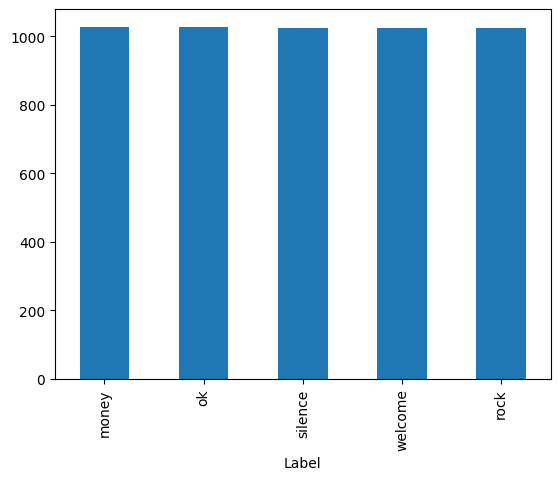

In [12]:
# visualize the count of target values
df['Label'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

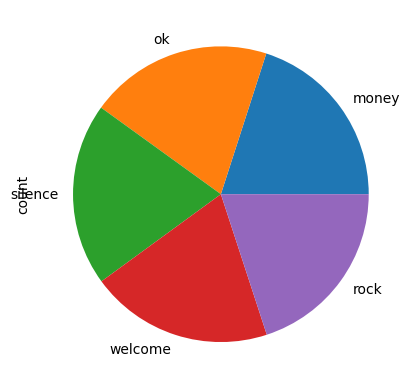

In [13]:
df['Label'].value_counts().plot(kind='pie')

Based on the above info, we can see that the data is balanced

In [14]:
# check for missing values
df.isnull().sum()

frame                     0
pose_NOSE_x               0
pose_NOSE_y               0
pose_NOSE_z               0
pose_NOSE_visibility      0
                         ..
hand_right_PINKY_DIP_x    0
hand_right_PINKY_DIP_y    0
hand_right_PINKY_TIP_x    0
hand_right_PINKY_TIP_y    0
Label                     0
Length: 146, dtype: int64

Based on the above information, we can see that there are no missing values in the dataset

In [15]:
# get unique values for each column
df.nunique()

frame                      149
pose_NOSE_x               5041
pose_NOSE_y               4986
pose_NOSE_z               5092
pose_NOSE_visibility       634
                          ... 
hand_right_PINKY_DIP_x    4594
hand_right_PINKY_DIP_y    4585
hand_right_PINKY_TIP_x    4590
hand_right_PINKY_TIP_y    4588
Label                        5
Length: 146, dtype: int64

According to the above information, we can see that there are 5 unique labels in the dataset

# Data Preprocessing

In [16]:
# label encoding the labels
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [17]:
# check the encoded labels
df['Label'].value_counts()

Label
0    1028
1    1027
3    1026
4    1026
2    1025
Name: count, dtype: int64

In [18]:
# make a copy of the dataframe
df_new = df.copy()

In [19]:
# map the labels to the encoded labels
label_map = {label:num for num, label in enumerate(le.classes_)}

In [22]:
label_map

{'money': 0, 'ok': 1, 'rock': 2, 'silence': 3, 'welcome': 4}

# Data Reshaping

In [23]:
# Identify the indices where a new sequence/file starts
# This assumes 'frame' resets to 1 at the start of a new sequence/file
sequence_starts = df.index[df['frame'] == 1].tolist()
# Add the end of the DataFrame as the last index
sequence_starts.append(len(df))

# Calculate the length of each sequence
sequence_lengths = [sequence_starts[i + 1] - sequence_starts[i] for i in range(len(sequence_starts) - 1)]

# Determine the minimum and maximum sequence length
min_sequence_length = min(sequence_lengths)
max_sequence_length = max(sequence_lengths)



In [24]:
# Initialize lists for reshaped data
sequences = []
labels = []

for i in range(len(sequence_starts) - 1):
    start = sequence_starts[i]
    end = sequence_starts[i + 1]
    
    # Extract features (X) and labels (y)
    sequence= df.iloc[start:end].drop(['frame'], axis=1).values
    
   
    # Pad the sequence if it's shorter than your desired sequence length
    if len(sequence) < max_sequence_length:
        padding = np.zeros((max_sequence_length - len(sequence), sequence.shape[1]))
        sequence = np.vstack((sequence, padding)) 

    sequences.append(sequence)
     # Extract label (assuming the label for the start of the sequence applies to the whole sequence)
    sequence_label = df.iloc[start]['Label']
    labels.append(sequence_label)
    

In [25]:
# Convert the list of sequences into a NumPy array and split into X and y
X = np.array(sequences)
y = np.array(labels)

In [26]:
# convert the labels to categorical values
y = to_categorical(labels).astype(int)

In [27]:
y.shape

(40, 5)

# Create TensorFlow Dataset

In [28]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#creating dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y)) #X, y are assumed to be NumPy arrays or tensors. Each element of the dataset will be a tuple
dataset = dataset.cache() #adds caching to the dataset. Caching keeps the elements of the dataset in memory
dataset = dataset.shuffle(10000) #Shuffling is important during training to ensure that the model sees a different order of examples in each epoch.
dataset = dataset.batch(8) # number of lines(samples) in the set 8 
dataset = dataset.prefetch(8) # helps bottlenecks

2024-01-18 11:49:15.517268: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-01-18 11:49:15.517334: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-18 11:49:15.517348: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-18 11:49:15.517618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-18 11:49:15.518087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:

# Integer or None. Number of samples grouped in the set. If unspecified, batch_size will default to 32. 
batch_X, batch_y=dataset.as_numpy_iterator().next()
batch_X, batch_y

(array([[[ 0.537504,  0.316511, -0.344406, ...,  0.581466,  0.752732,
           1.      ],
         [ 0.537545,  0.313224, -0.368796, ...,  0.578795,  0.755261,
           1.      ],
         [ 0.536219,  0.31175 , -0.364408, ...,  0.576634,  0.755957,
           1.      ],
         ...,
         [ 0.478899,  0.277139, -0.406998, ...,  0.674131,  0.490482,
           1.      ],
         [ 0.480128,  0.277626, -0.45379 , ...,  0.674141,  0.496376,
           1.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ]],
 
        [[ 0.527482,  0.246934, -0.481461, ...,  0.585189,  0.840778,
           4.      ],
         [ 0.527485,  0.248129, -0.387324, ...,  0.582495,  0.841602,
           4.      ],
         [ 0.526106,  0.248233, -0.385116, ...,  0.585423,  0.840638,
           4.      ],
         ...,
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  

In [30]:
len(dataset)

5

# Splitting the Data into Training and Testing Sets

In [31]:
# Split the dataset into training and testing sets
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)+1)
print(len(train))
print(len(test))
len(val)

3
1


1

# Build the Model

In [32]:
# set the log directory for saving model training logs
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
# set early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1) 

In [34]:
# define the model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(149,145)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [35]:
# compile the model and define the loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])

In [36]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 149, 64)           53760     
                                                                 
 lstm_1 (LSTM)               (None, 149, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 208389 (814.02 KB)
Trainable params: 20838

In [293]:
# train the model
history = model.fit(train, epochs=200, callbacks=[tb_callback, early_stopping], validation_data=val)

Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 1.6251 - categorical_accuracy: 0.1667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 70s 23s/step - loss: 1.6251 - categorical_accuracy: 0.1667 - val_loss: 1.5769 - val_categorical_accuracy: 0.3750
Epoch 2/200
3/3 [==============================] - ETA: 0s - loss: 1.6167 - categorical_accuracy: 0.1667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 23s/step - loss: 1.6167 - categorical_accuracy: 0.1667 - val_loss: 1.6579 - val_categorical_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - ETA: 0s - loss: 1.6038 - categorical_accuracy: 0.1667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 23s/step - loss: 1.6038 - categorical_accuracy: 0.1667 - val_loss: 1.6087 - val_categorical_accuracy: 0.1250
Epoch 4/200
3/3 [==============================] - ETA: 0s - loss: 1.5865 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 1.5865 - categorical_accuracy: 0.2500 - val_loss: 1.5915 - val_categorical_accuracy: 0.2500
Epoch 5/200
3/3 [==============================] - ETA: 0s - loss: 1.5713 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 1.5713 - categorical_accuracy: 0.3333 - val_loss: 1.5586 - val_categorical_accuracy: 0.3750
Epoch 6/200
3/3 [==============================] - ETA: 0s - loss: 1.5476 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.5476 - categorical_accuracy: 0.4167 - val_loss: 1.5712 - val_categorical_accuracy: 0.2500
Epoch 7/200
3/3 [==============================] - ETA: 0s - loss: 1.5243 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.5243 - categorical_accuracy: 0.4583 - val_loss: 1.4662 - val_categorical_accuracy: 0.7500
Epoch 8/200
3/3 [==============================] - ETA: 0s - loss: 1.5310 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.5310 - categorical_accuracy: 0.4167 - val_loss: 1.4605 - val_categorical_accuracy: 0.7500
Epoch 9/200
3/3 [==============================] - ETA: 0s - loss: 1.4761 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.4761 - categorical_accuracy: 0.4167 - val_loss: 1.5837 - val_categorical_accuracy: 0.1250
Epoch 10/200
3/3 [==============================] - ETA: 0s - loss: 1.4680 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.4680 - categorical_accuracy: 0.3750 - val_loss: 1.4099 - val_categorical_accuracy: 0.5000
Epoch 11/200
3/3 [==============================] - ETA: 0s - loss: 1.4744 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.4744 - categorical_accuracy: 0.3333 - val_loss: 1.5017 - val_categorical_accuracy: 0.3750
Epoch 12/200
3/3 [==============================] - ETA: 0s - loss: 1.4330 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.4330 - categorical_accuracy: 0.4167 - val_loss: 1.3933 - val_categorical_accuracy: 0.3750
Epoch 13/200
3/3 [==============================] - ETA: 0s - loss: 1.4476 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 1.4476 - categorical_accuracy: 0.2500 - val_loss: 1.5343 - val_categorical_accuracy: 0.2500
Epoch 14/200
3/3 [==============================] - ETA: 0s - loss: 1.3677 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3677 - categorical_accuracy: 0.4167 - val_loss: 1.4629 - val_categorical_accuracy: 0.1250
Epoch 15/200
3/3 [==============================] - ETA: 0s - loss: 1.3965 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 22s/step - loss: 1.3965 - categorical_accuracy: 0.3333 - val_loss: 1.4350 - val_categorical_accuracy: 0.2500
Epoch 16/200
3/3 [==============================] - ETA: 0s - loss: 1.4490 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 1.4490 - categorical_accuracy: 0.3750 - val_loss: 1.6153 - val_categorical_accuracy: 0.1250
Epoch 17/200
3/3 [==============================] - ETA: 0s - loss: 1.4655 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 20s/step - loss: 1.4655 - categorical_accuracy: 0.4167 - val_loss: 1.3794 - val_categorical_accuracy: 0.8750
Epoch 18/200
3/3 [==============================] - ETA: 0s - loss: 1.4148 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4148 - categorical_accuracy: 0.5000 - val_loss: 1.3274 - val_categorical_accuracy: 0.7500
Epoch 19/200
3/3 [==============================] - ETA: 0s - loss: 1.3890 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.3890 - categorical_accuracy: 0.6250 - val_loss: 1.2932 - val_categorical_accuracy: 0.6250
Epoch 20/200
3/3 [==============================] - ETA: 0s - loss: 1.3697 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3697 - categorical_accuracy: 0.5417 - val_loss: 1.3282 - val_categorical_accuracy: 0.5000
Epoch 21/200
3/3 [==============================] - ETA: 0s - loss: 1.3820 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.3820 - categorical_accuracy: 0.5833 - val_loss: 1.3592 - val_categorical_accuracy: 0.6250
Epoch 22/200
3/3 [==============================] - ETA: 0s - loss: 1.3043 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.3043 - categorical_accuracy: 0.5833 - val_loss: 1.2704 - val_categorical_accuracy: 0.6250
Epoch 23/200
3/3 [==============================] - ETA: 0s - loss: 1.2912 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2912 - categorical_accuracy: 0.6667 - val_loss: 1.2404 - val_categorical_accuracy: 0.6250
Epoch 24/200
3/3 [==============================] - ETA: 0s - loss: 1.4295 - categorical_accuracy: 0.2917 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4295 - categorical_accuracy: 0.2917 - val_loss: 1.3129 - val_categorical_accuracy: 0.6250
Epoch 25/200
3/3 [==============================] - ETA: 0s - loss: 1.3555 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3555 - categorical_accuracy: 0.5417 - val_loss: 1.1722 - val_categorical_accuracy: 0.7500
Epoch 26/200
3/3 [==============================] - ETA: 0s - loss: 1.3260 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 1.3260 - categorical_accuracy: 0.5417 - val_loss: 1.1697 - val_categorical_accuracy: 0.8750
Epoch 27/200
3/3 [==============================] - ETA: 0s - loss: 1.2906 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2906 - categorical_accuracy: 0.5000 - val_loss: 1.3992 - val_categorical_accuracy: 0.5000
Epoch 28/200
3/3 [==============================] - ETA: 0s - loss: 1.3811 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 23s/step - loss: 1.3811 - categorical_accuracy: 0.4167 - val_loss: 1.4575 - val_categorical_accuracy: 0.3750
Epoch 29/200
3/3 [==============================] - ETA: 0s - loss: 1.2819 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.2819 - categorical_accuracy: 0.4583 - val_loss: 1.2668 - val_categorical_accuracy: 0.5000
Epoch 30/200
3/3 [==============================] - ETA: 0s - loss: 1.2515 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.2515 - categorical_accuracy: 0.4583 - val_loss: 1.2173 - val_categorical_accuracy: 0.6250
Epoch 31/200
3/3 [==============================] - ETA: 0s - loss: 1.2777 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2777 - categorical_accuracy: 0.4583 - val_loss: 1.4175 - val_categorical_accuracy: 0.5000
Epoch 32/200
3/3 [==============================] - ETA: 0s - loss: 1.3025 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 21s/step - loss: 1.3025 - categorical_accuracy: 0.5417 - val_loss: 1.4911 - val_categorical_accuracy: 0.2500
Epoch 33/200
3/3 [==============================] - ETA: 0s - loss: 1.2324 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 1.2324 - categorical_accuracy: 0.4583 - val_loss: 1.2006 - val_categorical_accuracy: 0.5000
Epoch 34/200
3/3 [==============================] - ETA: 0s - loss: 1.1399 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1399 - categorical_accuracy: 0.6250 - val_loss: 1.1675 - val_categorical_accuracy: 0.6250
Epoch 35/200
3/3 [==============================] - ETA: 0s - loss: 1.1985 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1985 - categorical_accuracy: 0.5417 - val_loss: 1.1440 - val_categorical_accuracy: 0.6250
Epoch 36/200
3/3 [==============================] - ETA: 0s - loss: 1.2149 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2149 - categorical_accuracy: 0.5833 - val_loss: 1.2306 - val_categorical_accuracy: 0.3750
Epoch 37/200
3/3 [==============================] - ETA: 0s - loss: 1.2556 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 1.2556 - categorical_accuracy: 0.4583 - val_loss: 1.2006 - val_categorical_accuracy: 0.5000
Epoch 38/200
3/3 [==============================] - ETA: 0s - loss: 1.2364 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2364 - categorical_accuracy: 0.6250 - val_loss: 1.3059 - val_categorical_accuracy: 0.5000
Epoch 39/200
3/3 [==============================] - ETA: 0s - loss: 1.3049 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.3049 - categorical_accuracy: 0.5417 - val_loss: 1.2523 - val_categorical_accuracy: 0.6250
Epoch 40/200
3/3 [==============================] - ETA: 0s - loss: 1.2486 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2486 - categorical_accuracy: 0.5000 - val_loss: 1.2990 - val_categorical_accuracy: 0.3750
Epoch 41/200
3/3 [==============================] - ETA: 0s - loss: 1.2354 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2354 - categorical_accuracy: 0.5833 - val_loss: 1.0711 - val_categorical_accuracy: 0.7500
Epoch 42/200
3/3 [==============================] - ETA: 0s - loss: 1.2550 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2550 - categorical_accuracy: 0.6250 - val_loss: 1.2895 - val_categorical_accuracy: 0.3750
Epoch 43/200
3/3 [==============================] - ETA: 0s - loss: 1.2223 - categorical_accuracy: 0.5417  WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 110s 45s/step - loss: 1.2223 - categorical_accuracy: 0.5417 - val_loss: 1.4001 - val_categorical_accuracy: 0.2500
Epoch 44/200
3/3 [==============================] - ETA: 0s - loss: 1.3362 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 21s/step - loss: 1.3362 - categorical_accuracy: 0.4167 - val_loss: 1.2507 - val_categorical_accuracy: 0.5000
Epoch 45/200
3/3 [==============================] - ETA: 0s - loss: 1.1695 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1695 - categorical_accuracy: 0.7083 - val_loss: 1.3153 - val_categorical_accuracy: 0.6250
Epoch 46/200
3/3 [==============================] - ETA: 0s - loss: 1.1744 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1744 - categorical_accuracy: 0.6250 - val_loss: 1.2318 - val_categorical_accuracy: 0.6250
Epoch 47/200
3/3 [==============================] - ETA: 0s - loss: 1.3923 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.3923 - categorical_accuracy: 0.3333 - val_loss: 1.3695 - val_categorical_accuracy: 0.2500
Epoch 48/200
3/3 [==============================] - ETA: 0s - loss: 1.3361 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.3361 - categorical_accuracy: 0.2500 - val_loss: 1.3150 - val_categorical_accuracy: 0.3750
Epoch 49/200
3/3 [==============================] - ETA: 0s - loss: 1.2171 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 23s/step - loss: 1.2171 - categorical_accuracy: 0.4583 - val_loss: 1.4300 - val_categorical_accuracy: 0.3750
Epoch 50/200
3/3 [==============================] - ETA: 0s - loss: 1.3482 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 22s/step - loss: 1.3482 - categorical_accuracy: 0.4167 - val_loss: 1.0928 - val_categorical_accuracy: 0.5000
Epoch 51/200
3/3 [==============================] - ETA: 0s - loss: 1.2705 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 69s 23s/step - loss: 1.2705 - categorical_accuracy: 0.4583 - val_loss: 1.3459 - val_categorical_accuracy: 0.5000
Epoch 52/200
3/3 [==============================] - ETA: 0s - loss: 1.2263 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2263 - categorical_accuracy: 0.6250 - val_loss: 1.3057 - val_categorical_accuracy: 0.3750
Epoch 53/200
3/3 [==============================] - ETA: 0s - loss: 1.2717 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2717 - categorical_accuracy: 0.3750 - val_loss: 1.2122 - val_categorical_accuracy: 0.5000
Epoch 54/200
3/3 [==============================] - ETA: 0s - loss: 1.2468 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 21s/step - loss: 1.2468 - categorical_accuracy: 0.5417 - val_loss: 1.3944 - val_categorical_accuracy: 0.3750
Epoch 55/200
3/3 [==============================] - ETA: 0s - loss: 1.4077 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4077 - categorical_accuracy: 0.3750 - val_loss: 1.3732 - val_categorical_accuracy: 0.3750
Epoch 56/200
3/3 [==============================] - ETA: 0s - loss: 1.3217 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3217 - categorical_accuracy: 0.5000 - val_loss: 1.5255 - val_categorical_accuracy: 0.3750
Epoch 57/200
3/3 [==============================] - ETA: 0s - loss: 1.3387 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3387 - categorical_accuracy: 0.3333 - val_loss: 1.2600 - val_categorical_accuracy: 0.3750
Epoch 58/200
3/3 [==============================] - ETA: 0s - loss: 1.2477 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2477 - categorical_accuracy: 0.4583 - val_loss: 1.5530 - val_categorical_accuracy: 0.2500
Epoch 59/200
3/3 [==============================] - ETA: 0s - loss: 1.2732 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.2732 - categorical_accuracy: 0.3333 - val_loss: 1.3725 - val_categorical_accuracy: 0.1250
Epoch 60/200
3/3 [==============================] - ETA: 0s - loss: 1.2199 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2199 - categorical_accuracy: 0.4167 - val_loss: 1.3324 - val_categorical_accuracy: 0.3750
Epoch 61/200
3/3 [==============================] - ETA: 0s - loss: 1.2400 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2400 - categorical_accuracy: 0.4167 - val_loss: 1.0819 - val_categorical_accuracy: 0.6250
Epoch 62/200
3/3 [==============================] - ETA: 0s - loss: 1.2987 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.2987 - categorical_accuracy: 0.3333 - val_loss: 1.1316 - val_categorical_accuracy: 0.6250
Epoch 63/200
3/3 [==============================] - ETA: 0s - loss: 1.3669 - categorical_accuracy: 0.2917 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.3669 - categorical_accuracy: 0.2917 - val_loss: 1.2894 - val_categorical_accuracy: 0.2500
Epoch 64/200
3/3 [==============================] - ETA: 0s - loss: 1.3130 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 475s 227s/step - loss: 1.3130 - categorical_accuracy: 0.3750 - val_loss: 1.3193 - val_categorical_accuracy: 0.3750
Epoch 65/200
3/3 [==============================] - ETA: 0s - loss: 1.3495 - categorical_accuracy: 0.4583   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1050s 515s/step - loss: 1.3495 - categorical_accuracy: 0.4583 - val_loss: 1.2659 - val_categorical_accuracy: 0.5000
Epoch 66/200
3/3 [==============================] - ETA: 0s - loss: 1.2654 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2654 - categorical_accuracy: 0.4583 - val_loss: 1.3538 - val_categorical_accuracy: 0.5000
Epoch 67/200
3/3 [==============================] - ETA: 0s - loss: 1.2064 - categorical_accuracy: 0.5833   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 963s 472s/step - loss: 1.2064 - categorical_accuracy: 0.5833 - val_loss: 0.9846 - val_categorical_accuracy: 0.7500
Epoch 68/200
3/3 [==============================] - ETA: 0s - loss: 1.1918 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1918 - categorical_accuracy: 0.5000 - val_loss: 1.2634 - val_categorical_accuracy: 0.1250
Epoch 69/200
3/3 [==============================] - ETA: 0s - loss: 1.0297 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0297 - categorical_accuracy: 0.5417 - val_loss: 1.0442 - val_categorical_accuracy: 0.6250
Epoch 70/200
3/3 [==============================] - ETA: 0s - loss: 1.1626 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.1626 - categorical_accuracy: 0.4167 - val_loss: 1.1872 - val_categorical_accuracy: 0.2500
Epoch 71/200
3/3 [==============================] - ETA: 0s - loss: 1.1381 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 22s/step - loss: 1.1381 - categorical_accuracy: 0.4167 - val_loss: 1.2394 - val_categorical_accuracy: 0.1250
Epoch 72/200
3/3 [==============================] - ETA: 0s - loss: 1.2534 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 1.2534 - categorical_accuracy: 0.3333 - val_loss: 1.7169 - val_categorical_accuracy: 0.1250
Epoch 73/200
3/3 [==============================] - ETA: 0s - loss: 1.4310 - categorical_accuracy: 0.2917 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 1.4310 - categorical_accuracy: 0.2917 - val_loss: 1.2093 - val_categorical_accuracy: 0.5000
Epoch 74/200
3/3 [==============================] - ETA: 0s - loss: 1.4598 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 1.4598 - categorical_accuracy: 0.2500 - val_loss: 1.3708 - val_categorical_accuracy: 0.0000e+00
Epoch 75/200
3/3 [==============================] - ETA: 0s - loss: 1.2267 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 22s/step - loss: 1.2267 - categorical_accuracy: 0.3333 - val_loss: 1.3040 - val_categorical_accuracy: 0.2500
Epoch 76/200
3/3 [==============================] - ETA: 0s - loss: 1.2602 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 22s/step - loss: 1.2602 - categorical_accuracy: 0.5417 - val_loss: 1.2975 - val_categorical_accuracy: 0.2500
Epoch 77/200
3/3 [==============================] - ETA: 0s - loss: 1.2451 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 23s/step - loss: 1.2451 - categorical_accuracy: 0.3750 - val_loss: 1.3657 - val_categorical_accuracy: 0.3750
Epoch 78/200
3/3 [==============================] - ETA: 0s - loss: 1.2710 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 71s 24s/step - loss: 1.2710 - categorical_accuracy: 0.4167 - val_loss: 1.1341 - val_categorical_accuracy: 0.5000
Epoch 79/200
3/3 [==============================] - ETA: 0s - loss: 1.2723 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 81s 28s/step - loss: 1.2723 - categorical_accuracy: 0.5000 - val_loss: 1.0917 - val_categorical_accuracy: 0.3750
Epoch 80/200
3/3 [==============================] - ETA: 0s - loss: 1.2160 - categorical_accuracy: 0.4583   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 967s 470s/step - loss: 1.2160 - categorical_accuracy: 0.4583 - val_loss: 0.9654 - val_categorical_accuracy: 0.5000
Epoch 81/200
3/3 [==============================] - ETA: 0s - loss: 1.1758 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1758 - categorical_accuracy: 0.4583 - val_loss: 1.0452 - val_categorical_accuracy: 0.6250
Epoch 82/200
3/3 [==============================] - ETA: 0s - loss: 1.0764 - categorical_accuracy: 0.5000   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1067s 523s/step - loss: 1.0764 - categorical_accuracy: 0.5000 - val_loss: 0.9963 - val_categorical_accuracy: 0.6250
Epoch 83/200
3/3 [==============================] - ETA: 0s - loss: 1.1357 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1357 - categorical_accuracy: 0.5000 - val_loss: 1.2094 - val_categorical_accuracy: 0.6250
Epoch 84/200
3/3 [==============================] - ETA: 0s - loss: 1.1350 - categorical_accuracy: 0.6250   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 997s 489s/step - loss: 1.1350 - categorical_accuracy: 0.6250 - val_loss: 1.3882 - val_categorical_accuracy: 0.2500
Epoch 85/200
3/3 [==============================] - ETA: 0s - loss: 1.2046 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2046 - categorical_accuracy: 0.5417 - val_loss: 1.1602 - val_categorical_accuracy: 0.6250
Epoch 86/200
3/3 [==============================] - ETA: 0s - loss: 1.2401 - categorical_accuracy: 0.4167  WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 470s 225s/step - loss: 1.2401 - categorical_accuracy: 0.4167 - val_loss: 1.2917 - val_categorical_accuracy: 0.5000
Epoch 87/200
3/3 [==============================] - ETA: 0s - loss: 1.2690 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2690 - categorical_accuracy: 0.5833 - val_loss: 1.1944 - val_categorical_accuracy: 0.6250
Epoch 88/200
3/3 [==============================] - ETA: 0s - loss: 1.2322 - categorical_accuracy: 0.4583   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1093s 537s/step - loss: 1.2322 - categorical_accuracy: 0.4583 - val_loss: 1.3113 - val_categorical_accuracy: 0.3750
Epoch 89/200
3/3 [==============================] - ETA: 0s - loss: 1.2826 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2826 - categorical_accuracy: 0.4583 - val_loss: 1.4500 - val_categorical_accuracy: 0.1250
Epoch 90/200
3/3 [==============================] - ETA: 0s - loss: 1.2436 - categorical_accuracy: 0.4167   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1045s 513s/step - loss: 1.2436 - categorical_accuracy: 0.4167 - val_loss: 1.1792 - val_categorical_accuracy: 0.2500
Epoch 91/200
3/3 [==============================] - ETA: 0s - loss: 1.2955 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2955 - categorical_accuracy: 0.3750 - val_loss: 1.2922 - val_categorical_accuracy: 0.3750
Epoch 92/200
3/3 [==============================] - ETA: 0s - loss: 1.2943 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1018s 499s/step - loss: 1.2943 - categorical_accuracy: 0.4167 - val_loss: 1.5193 - val_categorical_accuracy: 0.2500
Epoch 93/200
3/3 [==============================] - ETA: 0s - loss: 1.3658 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3658 - categorical_accuracy: 0.4167 - val_loss: 1.1009 - val_categorical_accuracy: 0.3750
Epoch 94/200
3/3 [==============================] - ETA: 0s - loss: 1.2117 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 971s 476s/step - loss: 1.2117 - categorical_accuracy: 0.3750 - val_loss: 1.5277 - val_categorical_accuracy: 0.2500
Epoch 95/200
3/3 [==============================] - ETA: 0s - loss: 1.5291 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.5291 - categorical_accuracy: 0.2500 - val_loss: 1.4920 - val_categorical_accuracy: 0.2500
Epoch 96/200
3/3 [==============================] - ETA: 0s - loss: 1.3764 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3764 - categorical_accuracy: 0.4167 - val_loss: 1.6430 - val_categorical_accuracy: 0.2500
Epoch 97/200
3/3 [==============================] - ETA: 0s - loss: 1.3820 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 960s 20s/step - loss: 1.3820 - categorical_accuracy: 0.3333 - val_loss: 1.2038 - val_categorical_accuracy: 0.3750
Epoch 98/200
3/3 [==============================] - ETA: 0s - loss: 1.4013 - categorical_accuracy: 0.2500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4013 - categorical_accuracy: 0.2500 - val_loss: 1.1827 - val_categorical_accuracy: 0.6250
Epoch 99/200
3/3 [==============================] - ETA: 0s - loss: 1.2655 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2655 - categorical_accuracy: 0.3750 - val_loss: 1.2474 - val_categorical_accuracy: 0.2500
Epoch 100/200
3/3 [==============================] - ETA: 0s - loss: 1.1557 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 982s 20s/step - loss: 1.1557 - categorical_accuracy: 0.4583 - val_loss: 1.0415 - val_categorical_accuracy: 0.6250
Epoch 101/200
3/3 [==============================] - ETA: 0s - loss: 1.1851 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1851 - categorical_accuracy: 0.4167 - val_loss: 1.1639 - val_categorical_accuracy: 0.3750
Epoch 102/200
3/3 [==============================] - ETA: 0s - loss: 1.1419 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1050s 20s/step - loss: 1.1419 - categorical_accuracy: 0.4167 - val_loss: 0.9887 - val_categorical_accuracy: 0.6250
Epoch 103/200
3/3 [==============================] - ETA: 0s - loss: 1.2034 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2034 - categorical_accuracy: 0.4583 - val_loss: 1.1138 - val_categorical_accuracy: 0.3750
Epoch 104/200
3/3 [==============================] - ETA: 0s - loss: 1.2789 - categorical_accuracy: 0.4583   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1009s 495s/step - loss: 1.2789 - categorical_accuracy: 0.4583 - val_loss: 1.4226 - val_categorical_accuracy: 0.1250
Epoch 105/200
3/3 [==============================] - ETA: 0s - loss: 1.4310 - categorical_accuracy: 0.2083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4310 - categorical_accuracy: 0.2083 - val_loss: 1.4349 - val_categorical_accuracy: 0.2500
Epoch 106/200
3/3 [==============================] - ETA: 0s - loss: 1.4095 - categorical_accuracy: 0.2917   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 988s 484s/step - loss: 1.4095 - categorical_accuracy: 0.2917 - val_loss: 1.2858 - val_categorical_accuracy: 0.3750
Epoch 107/200
3/3 [==============================] - ETA: 0s - loss: 1.3848 - categorical_accuracy: 0.2083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.3848 - categorical_accuracy: 0.2083 - val_loss: 1.5266 - val_categorical_accuracy: 0.1250
Epoch 108/200
3/3 [==============================] - ETA: 0s - loss: 1.3002 - categorical_accuracy: 0.4583   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1037s 508s/step - loss: 1.3002 - categorical_accuracy: 0.4583 - val_loss: 1.2458 - val_categorical_accuracy: 0.5000
Epoch 109/200
3/3 [==============================] - ETA: 0s - loss: 1.2149 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2149 - categorical_accuracy: 0.6250 - val_loss: 1.4108 - val_categorical_accuracy: 0.3750
Epoch 110/200
3/3 [==============================] - ETA: 0s - loss: 1.1812 - categorical_accuracy: 0.5417   WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 968s 474s/step - loss: 1.1812 - categorical_accuracy: 0.5417 - val_loss: 1.0065 - val_categorical_accuracy: 0.6250
Epoch 111/200
3/3 [==============================] - ETA: 0s - loss: 1.2152 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2152 - categorical_accuracy: 0.5000 - val_loss: 1.2737 - val_categorical_accuracy: 0.5000
Epoch 112/200
3/3 [==============================] - ETA: 0s - loss: 1.1352 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1018s 499s/step - loss: 1.1352 - categorical_accuracy: 0.5833 - val_loss: 1.4277 - val_categorical_accuracy: 0.5000
Epoch 113/200
3/3 [==============================] - ETA: 0s - loss: 1.4606 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4606 - categorical_accuracy: 0.4167 - val_loss: 1.2602 - val_categorical_accuracy: 0.5000
Epoch 114/200
3/3 [==============================] - ETA: 0s - loss: 1.2510 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1063s 521s/step - loss: 1.2510 - categorical_accuracy: 0.5417 - val_loss: 1.4850 - val_categorical_accuracy: 0.5000
Epoch 115/200
3/3 [==============================] - ETA: 0s - loss: 1.4672 - categorical_accuracy: 0.3333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.4672 - categorical_accuracy: 0.3333 - val_loss: 1.3369 - val_categorical_accuracy: 0.3750
Epoch 116/200
3/3 [==============================] - ETA: 0s - loss: 1.3210 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1050s 515s/step - loss: 1.3210 - categorical_accuracy: 0.4583 - val_loss: 1.2485 - val_categorical_accuracy: 0.6250
Epoch 117/200
3/3 [==============================] - ETA: 0s - loss: 1.2875 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.2875 - categorical_accuracy: 0.4583 - val_loss: 1.3592 - val_categorical_accuracy: 0.5000
Epoch 118/200
3/3 [==============================] - ETA: 0s - loss: 1.1904 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 995s 488s/step - loss: 1.1904 - categorical_accuracy: 0.5000 - val_loss: 1.1217 - val_categorical_accuracy: 0.7500
Epoch 119/200
3/3 [==============================] - ETA: 0s - loss: 1.0708 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0708 - categorical_accuracy: 0.7083 - val_loss: 0.8996 - val_categorical_accuracy: 0.6250
Epoch 120/200
3/3 [==============================] - ETA: 0s - loss: 1.0684 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0684 - categorical_accuracy: 0.5833 - val_loss: 0.9039 - val_categorical_accuracy: 0.6250
Epoch 121/200
3/3 [==============================] - ETA: 0s - loss: 0.9278 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9278 - categorical_accuracy: 0.6250 - val_loss: 0.9502 - val_categorical_accuracy: 0.6250
Epoch 122/200
3/3 [==============================] - ETA: 0s - loss: 0.9978 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9978 - categorical_accuracy: 0.4583 - val_loss: 0.9972 - val_categorical_accuracy: 0.6250
Epoch 123/200
3/3 [==============================] - ETA: 0s - loss: 1.0669 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0669 - categorical_accuracy: 0.5833 - val_loss: 1.0391 - val_categorical_accuracy: 0.7500
Epoch 124/200
3/3 [==============================] - ETA: 0s - loss: 1.1400 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1400 - categorical_accuracy: 0.5000 - val_loss: 1.0637 - val_categorical_accuracy: 0.5000
Epoch 125/200
3/3 [==============================] - ETA: 0s - loss: 1.0820 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0820 - categorical_accuracy: 0.5000 - val_loss: 1.1214 - val_categorical_accuracy: 0.6250
Epoch 126/200
3/3 [==============================] - ETA: 0s - loss: 1.0848 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0848 - categorical_accuracy: 0.5417 - val_loss: 1.0807 - val_categorical_accuracy: 0.2500
Epoch 127/200
3/3 [==============================] - ETA: 0s - loss: 1.1145 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1145 - categorical_accuracy: 0.5417 - val_loss: 1.1670 - val_categorical_accuracy: 0.7500
Epoch 128/200
3/3 [==============================] - ETA: 0s - loss: 1.0068 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0068 - categorical_accuracy: 0.6667 - val_loss: 0.8975 - val_categorical_accuracy: 0.6250
Epoch 129/200
3/3 [==============================] - ETA: 0s - loss: 1.0237 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0237 - categorical_accuracy: 0.5833 - val_loss: 0.8286 - val_categorical_accuracy: 0.6250
Epoch 130/200
3/3 [==============================] - ETA: 0s - loss: 1.0548 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0548 - categorical_accuracy: 0.3750 - val_loss: 0.9926 - val_categorical_accuracy: 0.6250
Epoch 131/200
3/3 [==============================] - ETA: 0s - loss: 1.0024 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0024 - categorical_accuracy: 0.6250 - val_loss: 0.8733 - val_categorical_accuracy: 0.6250
Epoch 132/200
3/3 [==============================] - ETA: 0s - loss: 0.9774 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9774 - categorical_accuracy: 0.5417 - val_loss: 0.8487 - val_categorical_accuracy: 0.6250
Epoch 133/200
3/3 [==============================] - ETA: 0s - loss: 0.9253 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9253 - categorical_accuracy: 0.5417 - val_loss: 0.6715 - val_categorical_accuracy: 0.7500
Epoch 134/200
3/3 [==============================] - ETA: 0s - loss: 0.8540 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.8540 - categorical_accuracy: 0.5000 - val_loss: 0.8658 - val_categorical_accuracy: 0.5000
Epoch 135/200
3/3 [==============================] - ETA: 0s - loss: 0.8774 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1121s 20s/step - loss: 0.8774 - categorical_accuracy: 0.5417 - val_loss: 1.0021 - val_categorical_accuracy: 0.7500
Epoch 136/200
3/3 [==============================] - ETA: 0s - loss: 0.8757 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.8757 - categorical_accuracy: 0.7500 - val_loss: 1.0665 - val_categorical_accuracy: 0.8750
Epoch 137/200
3/3 [==============================] - ETA: 0s - loss: 0.8677 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 965s 20s/step - loss: 0.8677 - categorical_accuracy: 0.6667 - val_loss: 0.7501 - val_categorical_accuracy: 0.6250
Epoch 138/200
3/3 [==============================] - ETA: 0s - loss: 0.8351 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.8351 - categorical_accuracy: 0.6250 - val_loss: 1.0223 - val_categorical_accuracy: 0.3750
Epoch 139/200
3/3 [==============================] - ETA: 0s - loss: 0.9566 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 1011s 20s/step - loss: 0.9566 - categorical_accuracy: 0.5417 - val_loss: 0.9756 - val_categorical_accuracy: 0.7500
Epoch 140/200
3/3 [==============================] - ETA: 0s - loss: 0.9008 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 22s/step - loss: 0.9008 - categorical_accuracy: 0.6250 - val_loss: 0.8473 - val_categorical_accuracy: 0.7500
Epoch 141/200
3/3 [==============================] - ETA: 0s - loss: 0.8936 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 0.8936 - categorical_accuracy: 0.6667 - val_loss: 0.7499 - val_categorical_accuracy: 0.8750
Epoch 142/200
3/3 [==============================] - ETA: 0s - loss: 0.9152 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 0.9152 - categorical_accuracy: 0.5833 - val_loss: 0.9792 - val_categorical_accuracy: 0.3750
Epoch 143/200
3/3 [==============================] - ETA: 0s - loss: 0.9546 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 20s/step - loss: 0.9546 - categorical_accuracy: 0.5833 - val_loss: 0.8705 - val_categorical_accuracy: 0.8750
Epoch 144/200
3/3 [==============================] - ETA: 0s - loss: 0.8954 - categorical_accuracy: 0.8333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 20s/step - loss: 0.8954 - categorical_accuracy: 0.8333 - val_loss: 0.7974 - val_categorical_accuracy: 0.7500
Epoch 145/200
3/3 [==============================] - ETA: 0s - loss: 0.8600 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.8600 - categorical_accuracy: 0.7500 - val_loss: 0.8910 - val_categorical_accuracy: 0.6250
Epoch 146/200
3/3 [==============================] - ETA: 0s - loss: 0.9334 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9334 - categorical_accuracy: 0.5833 - val_loss: 0.8866 - val_categorical_accuracy: 0.5000
Epoch 147/200
3/3 [==============================] - ETA: 0s - loss: 0.9296 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9296 - categorical_accuracy: 0.5417 - val_loss: 1.0141 - val_categorical_accuracy: 0.3750
Epoch 148/200
3/3 [==============================] - ETA: 0s - loss: 0.9056 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9056 - categorical_accuracy: 0.4167 - val_loss: 0.9216 - val_categorical_accuracy: 0.7500
Epoch 149/200
3/3 [==============================] - ETA: 0s - loss: 1.1307 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 21s/step - loss: 1.1307 - categorical_accuracy: 0.3750 - val_loss: 1.0529 - val_categorical_accuracy: 0.6250
Epoch 150/200
3/3 [==============================] - ETA: 0s - loss: 1.0889 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 63s 21s/step - loss: 1.0889 - categorical_accuracy: 0.5000 - val_loss: 1.1088 - val_categorical_accuracy: 0.1250
Epoch 151/200
3/3 [==============================] - ETA: 0s - loss: 1.0692 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 62s 21s/step - loss: 1.0692 - categorical_accuracy: 0.5833 - val_loss: 1.0931 - val_categorical_accuracy: 0.5000
Epoch 152/200
3/3 [==============================] - ETA: 0s - loss: 1.0985 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0985 - categorical_accuracy: 0.4583 - val_loss: 1.0667 - val_categorical_accuracy: 0.3750
Epoch 153/200
3/3 [==============================] - ETA: 0s - loss: 1.1392 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1392 - categorical_accuracy: 0.4167 - val_loss: 1.1343 - val_categorical_accuracy: 0.3750
Epoch 154/200
3/3 [==============================] - ETA: 0s - loss: 0.8908 - categorical_accuracy: 0.4583 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.8908 - categorical_accuracy: 0.4583 - val_loss: 1.3801 - val_categorical_accuracy: 0.1250
Epoch 155/200
3/3 [==============================] - ETA: 0s - loss: 1.1334 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 1.1334 - categorical_accuracy: 0.4167 - val_loss: 1.0894 - val_categorical_accuracy: 0.6250
Epoch 156/200
3/3 [==============================] - ETA: 0s - loss: 1.1602 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.1602 - categorical_accuracy: 0.5833 - val_loss: 1.0027 - val_categorical_accuracy: 0.6250
Epoch 157/200
3/3 [==============================] - ETA: 0s - loss: 1.0759 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 1.0759 - categorical_accuracy: 0.5000 - val_loss: 1.0140 - val_categorical_accuracy: 0.7500
Epoch 158/200
3/3 [==============================] - ETA: 0s - loss: 0.9636 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 60s 20s/step - loss: 0.9636 - categorical_accuracy: 0.7500 - val_loss: 0.8956 - val_categorical_accuracy: 0.6250
Epoch 159/200
3/3 [==============================] - ETA: 0s - loss: 0.9066 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 61s 21s/step - loss: 0.9066 - categorical_accuracy: 0.7500 - val_loss: 0.9689 - val_categorical_accuracy: 0.6250
Epoch 160/200
3/3 [==============================] - ETA: 0s - loss: 0.9727 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.9727 - categorical_accuracy: 0.5000 - val_loss: 0.7697 - val_categorical_accuracy: 0.6250
Epoch 161/200
3/3 [==============================] - ETA: 0s - loss: 0.9179 - categorical_accuracy: 0.3750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 72s 25s/step - loss: 0.9179 - categorical_accuracy: 0.3750 - val_loss: 0.9968 - val_categorical_accuracy: 0.6250
Epoch 162/200
3/3 [==============================] - ETA: 0s - loss: 0.9079 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 81s 27s/step - loss: 0.9079 - categorical_accuracy: 0.5833 - val_loss: 0.9723 - val_categorical_accuracy: 0.7500
Epoch 163/200
3/3 [==============================] - ETA: 0s - loss: 0.8725 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 80s 28s/step - loss: 0.8725 - categorical_accuracy: 0.5833 - val_loss: 0.7821 - val_categorical_accuracy: 0.7500
Epoch 164/200
3/3 [==============================] - ETA: 0s - loss: 0.9582 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 82s 28s/step - loss: 0.9582 - categorical_accuracy: 0.5417 - val_loss: 0.8156 - val_categorical_accuracy: 0.6250
Epoch 165/200
3/3 [==============================] - ETA: 0s - loss: 0.8184 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 81s 27s/step - loss: 0.8184 - categorical_accuracy: 0.7083 - val_loss: 0.7954 - val_categorical_accuracy: 0.8750
Epoch 166/200
3/3 [==============================] - ETA: 0s - loss: 0.7910 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 85s 30s/step - loss: 0.7910 - categorical_accuracy: 0.6667 - val_loss: 1.0144 - val_categorical_accuracy: 0.5000
Epoch 167/200
3/3 [==============================] - ETA: 0s - loss: 0.8824 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 75s 25s/step - loss: 0.8824 - categorical_accuracy: 0.5417 - val_loss: 0.6758 - val_categorical_accuracy: 0.6250
Epoch 168/200
3/3 [==============================] - ETA: 0s - loss: 0.9155 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 100s 33s/step - loss: 0.9155 - categorical_accuracy: 0.5000 - val_loss: 0.7819 - val_categorical_accuracy: 0.8750
Epoch 169/200
3/3 [==============================] - ETA: 0s - loss: 0.8234 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 89s 26s/step - loss: 0.8234 - categorical_accuracy: 0.5417 - val_loss: 0.9826 - val_categorical_accuracy: 0.6250
Epoch 170/200
3/3 [==============================] - ETA: 0s - loss: 0.7161 - categorical_accuracy: 0.7917 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 82s 28s/step - loss: 0.7161 - categorical_accuracy: 0.7917 - val_loss: 0.9956 - val_categorical_accuracy: 0.6250
Epoch 171/200
3/3 [==============================] - ETA: 0s - loss: 0.9092 - categorical_accuracy: 0.5417 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 81s 27s/step - loss: 0.9092 - categorical_accuracy: 0.5417 - val_loss: 0.9038 - val_categorical_accuracy: 0.5000
Epoch 172/200
3/3 [==============================] - ETA: 0s - loss: 0.7759 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 22s/step - loss: 0.7759 - categorical_accuracy: 0.7083 - val_loss: 0.8653 - val_categorical_accuracy: 0.5000
Epoch 173/200
3/3 [==============================] - ETA: 0s - loss: 0.8943 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 22s/step - loss: 0.8943 - categorical_accuracy: 0.5833 - val_loss: 0.7639 - val_categorical_accuracy: 0.6250
Epoch 174/200
3/3 [==============================] - ETA: 0s - loss: 0.7370 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 23s/step - loss: 0.7370 - categorical_accuracy: 0.7083 - val_loss: 0.8557 - val_categorical_accuracy: 0.5000
Epoch 175/200
3/3 [==============================] - ETA: 0s - loss: 0.7940 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 73s 23s/step - loss: 0.7940 - categorical_accuracy: 0.5000 - val_loss: 0.5966 - val_categorical_accuracy: 0.7500
Epoch 176/200
3/3 [==============================] - ETA: 0s - loss: 0.7550 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 74s 26s/step - loss: 0.7550 - categorical_accuracy: 0.6667 - val_loss: 0.7278 - val_categorical_accuracy: 0.7500
Epoch 177/200
3/3 [==============================] - ETA: 0s - loss: 0.7987 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 72s 23s/step - loss: 0.7987 - categorical_accuracy: 0.7083 - val_loss: 0.6544 - val_categorical_accuracy: 0.8750
Epoch 178/200
3/3 [==============================] - ETA: 0s - loss: 0.7746 - categorical_accuracy: 0.6250 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 72s 25s/step - loss: 0.7746 - categorical_accuracy: 0.6250 - val_loss: 0.6300 - val_categorical_accuracy: 0.6250
Epoch 179/200
3/3 [==============================] - ETA: 0s - loss: 0.7709 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 77s 25s/step - loss: 0.7709 - categorical_accuracy: 0.5833 - val_loss: 0.8865 - val_categorical_accuracy: 0.3750
Epoch 180/200
3/3 [==============================] - ETA: 0s - loss: 0.7516 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 74s 24s/step - loss: 0.7516 - categorical_accuracy: 0.6667 - val_loss: 0.8462 - val_categorical_accuracy: 0.6250
Epoch 181/200
3/3 [==============================] - ETA: 0s - loss: 0.7516 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 70s 24s/step - loss: 0.7516 - categorical_accuracy: 0.7083 - val_loss: 0.7514 - val_categorical_accuracy: 0.6250
Epoch 182/200
3/3 [==============================] - ETA: 0s - loss: 0.8654 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 69s 22s/step - loss: 0.8654 - categorical_accuracy: 0.6667 - val_loss: 0.5735 - val_categorical_accuracy: 0.7500
Epoch 183/200
3/3 [==============================] - ETA: 0s - loss: 0.7638 - categorical_accuracy: 0.5833 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 67s 22s/step - loss: 0.7638 - categorical_accuracy: 0.5833 - val_loss: 1.0212 - val_categorical_accuracy: 0.2500
Epoch 184/200
3/3 [==============================] - ETA: 0s - loss: 0.9549 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.9549 - categorical_accuracy: 0.5000 - val_loss: 0.7685 - val_categorical_accuracy: 0.5000
Epoch 185/200
3/3 [==============================] - ETA: 0s - loss: 1.0525 - categorical_accuracy: 0.4167 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 1.0525 - categorical_accuracy: 0.4167 - val_loss: 1.1071 - val_categorical_accuracy: 0.2500
Epoch 186/200
3/3 [==============================] - ETA: 0s - loss: 0.8141 - categorical_accuracy: 0.5000 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 0.8141 - categorical_accuracy: 0.5000 - val_loss: 0.8277 - val_categorical_accuracy: 0.5000
Epoch 187/200
3/3 [==============================] - ETA: 0s - loss: 0.8029 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 23s/step - loss: 0.8029 - categorical_accuracy: 0.7500 - val_loss: 0.7504 - val_categorical_accuracy: 0.5000
Epoch 188/200
3/3 [==============================] - ETA: 0s - loss: 0.7241 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 68s 22s/step - loss: 0.7241 - categorical_accuracy: 0.7083 - val_loss: 0.6906 - val_categorical_accuracy: 0.7500
Epoch 189/200
3/3 [==============================] - ETA: 0s - loss: 0.7756 - categorical_accuracy: 0.6667 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 22s/step - loss: 0.7756 - categorical_accuracy: 0.6667 - val_loss: 0.6672 - val_categorical_accuracy: 0.7500
Epoch 190/200
3/3 [==============================] - ETA: 0s - loss: 0.7234 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.7234 - categorical_accuracy: 0.7083 - val_loss: 0.6135 - val_categorical_accuracy: 0.6250
Epoch 191/200
3/3 [==============================] - ETA: 0s - loss: 0.6276 - categorical_accuracy: 0.7083 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.6276 - categorical_accuracy: 0.7083 - val_loss: 0.7322 - val_categorical_accuracy: 0.7500
Epoch 192/200
3/3 [==============================] - ETA: 0s - loss: 0.6551 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.6551 - categorical_accuracy: 0.7500 - val_loss: 0.6825 - val_categorical_accuracy: 0.8750
Epoch 193/200
3/3 [==============================] - ETA: 0s - loss: 0.6233 - categorical_accuracy: 0.8333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.6233 - categorical_accuracy: 0.8333 - val_loss: 0.6142 - val_categorical_accuracy: 0.7500
Epoch 194/200
3/3 [==============================] - ETA: 0s - loss: 0.5799 - categorical_accuracy: 0.8333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.5799 - categorical_accuracy: 0.8333 - val_loss: 0.4037 - val_categorical_accuracy: 0.8750
Epoch 195/200
3/3 [==============================] - ETA: 0s - loss: 0.6771 - categorical_accuracy: 0.8333 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 66s 22s/step - loss: 0.6771 - categorical_accuracy: 0.8333 - val_loss: 0.7358 - val_categorical_accuracy: 0.8750
Epoch 196/200
3/3 [==============================] - ETA: 0s - loss: 0.5852 - categorical_accuracy: 0.8750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 22s/step - loss: 0.5852 - categorical_accuracy: 0.8750 - val_loss: 0.5164 - val_categorical_accuracy: 0.8750
Epoch 197/200
3/3 [==============================] - ETA: 0s - loss: 0.5899 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 65s 22s/step - loss: 0.5899 - categorical_accuracy: 0.7500 - val_loss: 0.2893 - val_categorical_accuracy: 0.8750
Epoch 198/200
3/3 [==============================] - ETA: 0s - loss: 0.5629 - categorical_accuracy: 0.7500 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 70s 23s/step - loss: 0.5629 - categorical_accuracy: 0.7500 - val_loss: 0.3871 - val_categorical_accuracy: 0.8750
Epoch 199/200
3/3 [==============================] - ETA: 0s - loss: 0.4794 - categorical_accuracy: 0.8750 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 21s/step - loss: 0.4794 - categorical_accuracy: 0.8750 - val_loss: 0.6199 - val_categorical_accuracy: 0.7500
Epoch 200/200
3/3 [==============================] - ETA: 0s - loss: 0.6281 - categorical_accuracy: 0.7917 WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,categorical_accuracy,val_loss,val_categorical_accuracy


3/3 [==============================] - 64s 21s/step - loss: 0.6281 - categorical_accuracy: 0.7917 - val_loss: 0.4660 - val_categorical_accuracy: 0.8750


# Visualize the training and validation accuracy and loss

<Figure size 800x500 with 0 Axes>

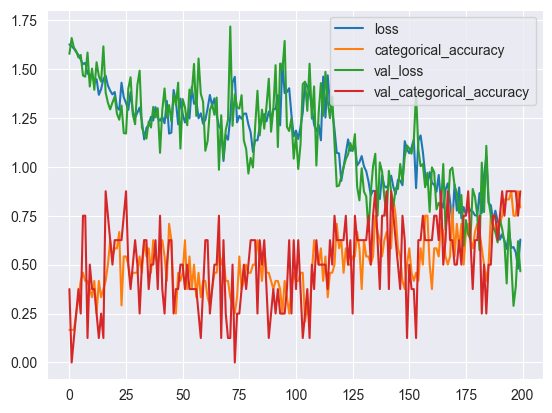

In [297]:
# Visualize the training and validation accuracy and loss
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

#### Results of the model:
- The model is overfitting, but the validation accuracy is still good enough
- The model is not complex enough to predict the labels with high level of probability
- One of the reasons of the overfitting is the small size of the dataset
- The trend of the validation accuracy is positive, so if we train the model with more data, the model will be able to predict the labels with higher level of accuracy
- Also considering positive trend of the model performance on the validation set, could be reasonable add more  epochs to the training process 

# Make Predictions with test data

In [309]:
#checking the batch
batch_X, batch_y = test.as_numpy_iterator().next()

In [310]:
# Predict with the model
predictions = model.predict(batch_X)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

# Reverse the label map
reverse_label_map = {v: k for k, v in label_map.items()}

# Convert indices to original labels
predicted_labels = [reverse_label_map[idx] for idx in predicted_indices]


1/1 [==============================] - 4s 4s/step


In [311]:
predicted_labels

['rock', 'welcome', 'welcome', 'ok', 'money', 'welcome', 'welcome', 'welcome']

In [312]:
# Convert true values to class indices
true_indices = np.argmax(batch_y, axis=1)

# Reverse the label map
true_label_map = {v: k for k, v in label_map.items()}

# Convert indices to original labels
true_labels = [reverse_label_map[idx] for idx in predicted_indices]

In [313]:
true_labels

['rock', 'welcome', 'welcome', 'ok', 'money', 'welcome', 'welcome', 'welcome']

#### Despite pure performance during learning process, it is still able to predict the tets labels with 100% accuracy 

# Save model

In [37]:
model.load_weights('gestures5.h5')

# Evaluation using Confusion Matrix and Accuracy with all dataset

In [38]:
#checking the batch
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [39]:
# Predict with the model
predictions = model.predict(batch_X)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

# Reverse the label map
reverse_label_map = {v: k for k, v in label_map.items()}

# Convert indices to original labels
predicted_labels = [reverse_label_map[idx] for idx in predicted_indices]


2024-01-18 11:49:54.628619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step


In [40]:
predicted_labels

['ok', 'silence', 'rock', 'rock', 'ok', 'rock', 'ok', 'silence']

In [41]:
# Convert true values to class indices
true_indices = np.argmax(batch_y, axis=1)

# Reverse the label map
true_label_map = {v: k for k, v in label_map.items()}

# Convert indices to original labels
true_labels = [reverse_label_map[idx] for idx in predicted_indices]

In [42]:
true_labels

['ok', 'silence', 'rock', 'rock', 'ok', 'rock', 'ok', 'silence']

In [43]:
# confusion matrix shows first 2 labels
multilabel_confusion_matrix(predicted_labels, true_labels)

array([[[5, 0],
        [0, 3]],

       [[5, 0],
        [0, 3]],

       [[6, 0],
        [0, 2]]])

In [44]:
accuracy_score(predicted_labels, true_labels)

1.0

#### Same good results for the whole dataset

# Results

- #### So based on analysis we can see that the model is good enough to predict the labels despite the fact that the dataset is not big enough and the model is not complex enough.
- #### Training was done with 5 classes only and the model was able to predict the labels of the test with 100% accuracy, despite the decent performance on the validation set during training.
- #### If proceed with the training with more data considering positive trend of the model performance on the validation set, the model will be able to predict the labels with higher level of probability.
- #### Required the real time testing

  